# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [63]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

df = pd.read_csv('data/human_body_temperature.csv')

# 1. is the distribution of body temperatures normal? 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3693611/







In [64]:
#some EDA
print(len(df))
df.head()
#define ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

130


<function matplotlib.pyplot.show(*args, **kw)>

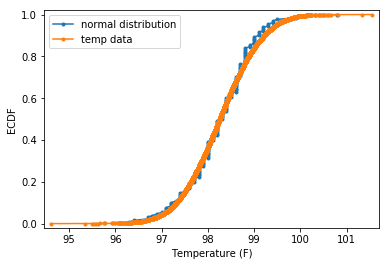

In [65]:
#visual inspection of data
x_t, y_t = ecdf(df['temperature'])
#create sample distribution based on mean and standard deviation of body temp data for visual comparison
norm_dist = np.random.normal(np.mean(df['temperature']),np.std(df['temperature']), size=10000)
x_normdist, y_normdist = ecdf(norm_dist)

_=plt.plot(x_t, y_t, marker='.')
_=plt.plot(x_normdist, y_normdist, marker='.')
plt.margins(0.02)
_=plt.xlabel('Temperature (F)')
_=plt.ylabel('ECDF')
_=plt.legend(('normal distribution','temp data'))
plt.show

Distribution looks normal!


# 2. Is the sample size large? Yes, because N = 130. Are the observations independent? 
Yes, the observations are independent because one observation (temperature, female, heart rate) does not affect another observation.
Is the true population mean really 98.6 degrees F?

Ho: x_bar = 98.6

Ha: x_bar != 98.6

In [66]:

df.describe()


,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


# 3. Is the true population mean really 98.6 degrees F?

 First, try a bootstrap hypothesis test. 
 Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? 
 In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic? 
 Now try using the other test. How is the result be different? Why?

**First, try a bootstrap hypothesis test.** 

A bootstrap hypothesis test involves creating a second data set that randomly pulls values from the sample data set with replacement. This code creates n1 samples of randomly generated means of data sampled from
df.temperature.

In [67]:
BS_sample1 = np.empty(10000)

n1 = len(BS_sample1)

for i in range(n1):
    BS_sample2 = np.random.choice(df.temperature, len(df.temperature))
    BS_sample1[i] = np.mean(BS_sample2)
    
p = np.sum(BS_sample1 >= 98.6) / 2
#p-value = (# boot-test-statistics >= observed test-statistic)/# bootstrap samples

print(p)
print(np.mean(BS_sample1))



0.0
98.24882446153845


With a p-value of < 0.5, we can reject the null hypothesis. This indicates that the true mean body temperature is less than 98.6 F.

**Now, let's try frequentist statistical testing.** Would you use a one-sample or two-sample test? Why?

In [68]:
#Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
#we will use a one-sample test because we are comparing a sample mean (98.2499) to a known population mean (98.6)

#In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
#we want to use the T test since the population standard deviation is not known
#Ho: x_bar = 98.6
#Ha: x_bar != 98.6
#T-test:
t_stat = stats.ttest_1samp(df.temperature, 98.6)[0]
p_stat = stats.ttest_1samp(df.temperature, 98.6)[1]
print(t_stat)
print(p_stat)





-5.4548232923645195
2.4106320415561276e-07


**Now try using the other test. How is the result be different? Why?**

In [69]:
#Z statistic can be estimated using the standard error of mean
sem = np.std(df.temperature)/np.sqrt(len(df.temperature))
z_stat = (np.mean(df.temperature) - 98.6)/sem
pz_stat = 2*stats.norm.cdf(z_stat)

print(z_stat)
print(pz_stat)

-5.475925202078116
4.3523151658821886e-08


Z-tests are statistical calculations that are used to compare a population mean to a sample mean. T-tests determine if there is a statistically significant difference between two independent sample groups. 
The result is be different because the z-test and t-test use different equations to compute the number of standard deviations the result is away from the population mean.
At values much greater than 30, the Z- and T-tests produce identical values.

**Z-test: z = (X-mu)/sigma, where:**<br>
    X = sample mean <br>
    mu = population mean (98.6) <br>
    sigma = population standard deviation <br>

**T-test: t = (X - mu)/(s/sqrt(n)), where:**<br>
    X = sample mean <br>
    mu = population mean (98.6) <br>
    sigma = population standard deviation <br>

# **4. Draw a small sample of size 10 from the data and repeat both frequentist tests.**

Which one is the correct one to use?

What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

In [70]:
randomsample = np.random.choice(df.temperature, size=10)
randomsample

array([98.8, 99.3, 96.8, 98.8, 98.6, 99.1, 98.8, 97.6, 99.5, 98.8])

In [71]:
#t-test
t_stat = stats.ttest_1samp(randomsample, 98.6)[0]
p_stat = stats.ttest_1samp(randomsample, 98.6)[1]
print(t_stat)
print(p_stat)

0.038895492079185294
0.969822836769338


In [72]:
#z-test
sem = np.std(randomsample)/np.sqrt(len(randomsample))
z_stat = (np.mean(randomsample) - 98.6)/sem
pz_stat = 2*stats.norm.cdf(z_stat)

print(z_stat)
print(pz_stat)

0.040999448561087934
1.0327036645215353


T-test is the correct test to use since the population standard deviation is not known. The p-value is greater than 0.05, which means the null hypothesis cannot be rejected (X = 98.6). We cannot reasonably conclude that the population mean is *not* 98.6

# 5. At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the bootstrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

**Start by computing the margin of error and confidence interval.**

**Bootstrap approach**

In [88]:
BS_sample1 = np.empty(100000)

n1 = len(BS_sample1)

for i in range(n1):
    BS_sample2 = np.random.choice(df.temperature, len(df.temperature))
    BS_sample1[i] = np.mean(BS_sample2)
    
p = np.sum(BS_sample1 >= 98.6) / 2
#p-value = (# boot-test-statistics >= observed test-statistic)/# bootstrap samples

print('P-value: {}'.format(p))
print('BS sample mean: {}'.format(np.mean(BS_sample1)))

#95% confidence interval
ci = stats.norm.interval(0.95, loc=np.mean(df.temperature), scale = np.std(df.temperature))
print(ci)
print('Margin of error: +/-{}'.format(ci[1]-np.mean(BS_sample1)))
print('I am 95% confident that a "normal" body temperature is between',round(ci[0],2),'and', round(ci[1],2))

P-value: 0.0
BS sample mean: 98.24956591538461
(96.81775582674824, 99.68070571171332)
Margin of error: +/-1.4311397963287078
I am 95% confident that a "normal" body temperature is between 96.82 and 99.68


**Frequentist Approach**<br>
In the frequentist approach, the confidence interval is based on the repetition of the observations.
We want to solve for mu 

In [78]:
t_stat = (np.mean(df.temperature) - 98.6)/(np.std(df.temperature)/(math.sqrt(len(df.temperature))))
print(t_stat)
#95% confidence interval



-5.475925202078116


When sampling the population, 95% of the time sampling will yield a body temperature between 96.82 and 99.68 F. Abnormal temperatures (5% of the sampling) will be either below 96.82F or above 99.68F. 

# 6. Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?

Write a story with your conclusion in the context of the original problem.

I am going to use a two sample t test to evaluate whether gender affects body temperatures<br>
Ho: Average male body temperature is equal to average female body temperature<br>
Ha: Average male body temperature is not equal to average female body temperature

In [86]:
#create male and female data frames for use in the two sample t test
m = df[df.gender =='M']
fm = df[df.gender == 'F']

m.head()

,temperature,gender,heart_rate
2,97.8,M,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
12,98.2,M,72.0


In [98]:
gender_t = stats.ttest_ind(m['temperature'],fm['temperature'])
ci_m = stats.norm.interval(0.95, loc=np.mean(m.temperature), scale = np.std(m.temperature))
ci_fm = stats.norm.interval(0.95, loc=np.mean(fm.temperature), scale = np.std(fm.temperature))
print('Male temp range:', ci_m)
print('Male avg temp:', np.mean(m.temperature))
print('Margin of error (male): +/-', ci_m[1]-np.mean(m.temperature))
print('Female temp range:', ci_fm)
print('Female avg temp:', np.mean(fm.temperature))
print('Margin of error (female): +/-', ci_fm[1]-np.mean(fm.temperature))
print(gender_t)

Male temp range: (96.74565498329211, 99.46357578593869)
Male avg temp: 98.1046153846154
Margin of error (male): +/- 1.3589604013232872
Female temp range: (96.94788968478372, 99.83980262290854)
Female avg temp: 98.39384615384613
Margin of error (female): +/- 1.4459564690624092
Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)


Since the p value is less than 0.05, we can reject the null hypothesis (gender does not affect average body temperature) with 95% confidence. In other words, we are 95% confident that there is a difference in normal body temperatures between the genders.

# Conclusions <br>
Based on our data set, we are 95% confident the average human body temperature is 98.25 +/- 1.43 F, less than the traditionally accepted value of 98.6 F. 
We are 95% confident that the average body temperature is 98.10 +/- 1.36 F for males and 98.39 +/- 1.45 F for females. A body temperature outside of these gender-specific ranges would be considered to be abnormal.
Females are significantly warmer and have more varying body temperatures than males.

